In [2]:
!pip install opencc-python-reimplemented
!wget https://dumps.wikimedia.org/zhwiki/20200301/zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2



from gensim.corpora import WikiCorpus

wiki_corpus = WikiCorpus('zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2', dictionary={})
next(iter(wiki_corpus.get_texts()))[:10]

text_num = 0

with open('wiki_text.txt', 'w', encoding='utf-8') as f:
    for text in wiki_corpus.get_texts():
        f.write(' '.join(text)+'\n')
        text_num += 1
        if text_num % 10000 == 0:
            print('{} articles processed.'.format(text_num))

    print('{} articles processed.'.format(text_num))

import jieba
from opencc import OpenCC


# Initial
cc = OpenCC('s2t')
train_data = open('wiki_text.txt', 'r', encoding='utf-8').read()
train_data = cc.convert(train_data)
train_data = jieba.lcut(train_data)
train_data = [word for word in train_data if word != '']
train_data = ' '.join(train_data)
open('seg.txt', 'w', encoding='utf-8').write(train_data)

from gensim.models import word2vec


# Settings
seed = 666
sg = 0
window_size = 10
vector_size = 100
min_count = 1
workers = 8
epochs = 5
batch_words = 10000

train_data = word2vec.LineSentence('seg.txt')
model = word2vec.Word2Vec(
    train_data,
    min_count=min_count,
    size=vector_size,
    workers=workers,
    iter=epochs,
    window=window_size,
    sg=sg,
    seed=seed,
    batch_words=batch_words
)

model.save('word2vec.model')


from gensim.models import word2vec

string = 'å¾®ç”Ÿç‰©'
model = word2vec.Word2Vec.load('word2vec.model')
print(string)

for item in model.wv.most_similar(string):
    print(item)


KeyboardInterrupt: ignored

In [4]:
!wget https://raw.githubusercontent.com/joshhu/must_examples/master/my_seg_small.txt


import sys
from gensim.models import word2vec
from gensim import models

sentences = word2vec.LineSentence("my_seg_small.txt")
model = word2vec.Word2Vec(sentences, size=5, min_count=1, negative=10)

model.save('word2vec.model')
model.wv.save_word2vec_format('word2vec.model', binary = False)
print('done')


input_str = "åŒ—äº¬"
res = model.wv.most_similar(input_str)
for item in res: 
      print(item[0] + ':' + str(item[1]))

--2020-04-23 02:04:49--  https://raw.githubusercontent.com/joshhu/must_examples/master/my_seg_small.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398 [text/plain]
Saving to: ‘my_seg_small.txt.1’

my_seg_small.txt.1  100%[===================>]     398  --.-KB/s    in 0s      

2020-04-23 02:04:49 (83.8 MB/s) - ‘my_seg_small.txt.1’ saved [398/398]

done


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyError: ignored

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


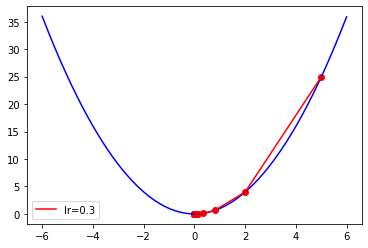

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# Main
# 起始權重
x_start = 5    
# 執行週期數
epochs = 15 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = GD(x_start, dfunc, epochs, lr=lr) 
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
#plt.plot(line_x, line_y, c='b')    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
data = np.random.random((1000, 10)) #隨機產生1000筆資料，每筆資料1包含十個float數字
labels = np.random.randint(2, size=(1000, 1)) #隨機產生1000筆資料，每筆資料上限為2(意思就是0 或 1)
print(np.shape(data))
print(data[0])
print(np.shape(labels))
print(labels[0])

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data, labels, epochs=10, batch_size=32)

score=model.evaluate(data, labels)
print(score[1])

Using TensorFlow backend.


(1000, 10)
[0.93222369 0.62384387 0.06825105 0.31049968 0.20285737 0.92939501
 0.69360192 0.18507981 0.21721298 0.35410896]
(1000, 1)
[0]
Epoch 1/10
1000/1000 [==============================] - 0s 276us/step - loss: 0.6947 - accuracy: 0.4990
Epoch 2/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6931 - accuracy: 0.5150
Epoch 3/10
1000/1000 [==============================] - 0s 32us/step - loss: 0.6915 - accuracy: 0.5190
Epoch 4/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6907 - accuracy: 0.5120
Epoch 5/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6900 - accuracy: 0.5090
Epoch 6/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6896 - accuracy: 0.5230
Epoch 7/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6890 - accuracy: 0.5220
Epoch 8/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6887 - accuracy: 0.5360
Epoch 9/10
1000/1000 [===============

In [12]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 10))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 10))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)
print(score)

Epoch 1/20
1000/1000 [==============================] - 0s 54us/step - loss: 2.3204 - accuracy: 0.0900
Epoch 2/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3117 - accuracy: 0.0930
Epoch 3/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3059 - accuracy: 0.0990
Epoch 4/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3030 - accuracy: 0.1010
Epoch 5/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3017 - accuracy: 0.1000
Epoch 6/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3004 - accuracy: 0.1130
Epoch 7/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.2990 - accuracy: 0.1190
Epoch 8/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.2985 - accuracy: 0.1220
Epoch 9/20
1000/1000 [==============================] - 0s 14us/step - loss: 2.2972 - accuracy: 0.1280
Epoch 10/20
1000/1000 [==============================] - 0s 20us/step - l

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 13s 218us/step - loss: 0.2218 - accuracy: 0.9339
Epoch 2/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.0957 - accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.0690 - accuracy: 0.9784
Epoch 4/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.0568 - accuracy: 0.9815
Epoch 5/5
10000/10000 [==============================] - 1s 52us/step


[0.07154907140610739, 0.979200005531311]

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D
from keras.optimizers import RMSprop
from keras import backend as K
from matplotlib.pyplot import imshow
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test)
print(scores[1])

60000 train samples
10000 test samples


NameError: ignored

TensorFlow is already loaded. Please restart the runtime to change versions.
x_train.shape=(60000, 28, 28), y_train.shape=(60000,)
x_test.shape=(10000, 28, 28), y_test.shape=(10000,)
x_train.shape=(60000, 28, 28, 1)
x_test.shape=(10000, 28, 28, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 36)          0         
____

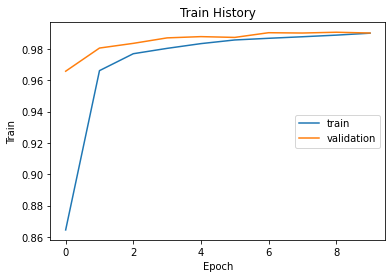

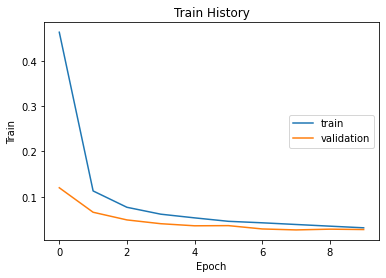

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,1,0,0,0,0,0,1,1,0
1,0,1128,1,1,1,0,1,2,1,0
2,1,1,1022,0,1,0,0,4,3,0
3,0,0,0,1006,0,2,0,1,1,0
4,1,1,0,0,973,0,0,0,1,6
5,1,0,0,5,0,883,1,1,0,1
6,7,2,0,1,4,5,937,0,2,0
7,0,2,4,0,0,0,0,1020,1,1
8,5,0,2,1,0,3,0,2,959,2


In [13]:
# 使用1.x版本的tensorflow
%tensorflow_version 1.x

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 讀取mnist資料 
# x_train為60000筆訓練資料,每一筆資料為28x28的灰階手寫數字
# y_train為60000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
# x_test為10000筆訓練資料,每一筆資料為28x28的灰階手寫數字
# y_test為10000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape={}, y_train.shape={}".format(x_train.shape, y_train.shape))
print("x_test.shape={}, y_test.shape={}".format(x_test.shape, y_test.shape))


# 接著我們必須將x_train及x_test dataset由原本三維轉為四維矩陣以符合CNN的需求
# 這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4。
# MNIST圖片為灰階因此其channel為1，轉換後的shape為(ID, width, height, channel)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print("x_train.shape={}".format(x_train.shape))
print("x_test.shape={}".format(x_test.shape))


# 接下來將dataset的特徵值進行標準化，方法是除以255（因為圖像的像素點介於0~255之間）
# 可讓所有的特徵值介於0與1之間。除了可提昇模型預測的準確度，梯度運算時也能更快收斂。

x_train = x_train / 255
x_test = x_test / 255


# 手寫數字結果如果採用原來的1, 2, 3....在演算法中，會以為2是1的兩倍大，3是1的三倍大，其實並沒有這個意義
# 因此會採用Onehot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值。
# 舉例來說，原本y_train[0]=5，經過onehot encoding會變成[0,0,0,0,0,1,0,0,0,0]

y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)

# CNN模型建置
# filter代表過濾器的數量, kernel_size代表filter的大小
# padding: filter遇到邊緣的處理模式('same'為補0, 'valid'為忽略)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()     


# 模型編譯
# loss:損失函數 optimizer:學習函數(梯度縮減的方式) metrics:評估模型好壞的方式(accuracy=正確率)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 模型訓練
# x:訓練資料 y:訓練資料的答案 validation_split:訓練資料的多少百分比要拿來驗證 validation_data:驗證資料 
# epochs:模型訓練次數 

train_history=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)


# 模型評估

scores = model.evaluate(x_test, y_test)
print("模型正確率為：{}".format(scores[1]))


#繪製正確性與損失立歷史圖
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict_classes(x_test)
print(y_test.shape)
pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

TensorFlow is already loaded. Please restart the runtime to change versions.
x_train.shape=(60000, 28, 28), y_train.shape=(60000,)
x_test.shape=(10000, 28, 28), y_test.shape=(10000,)
x_train.shape=(60000, 28, 28, 1)
x_test.shape=(10000, 28, 28, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 36)          0         
____

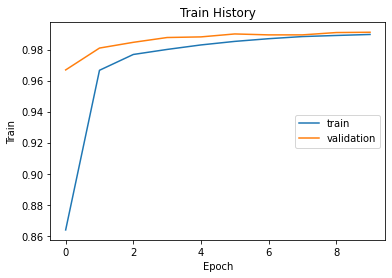

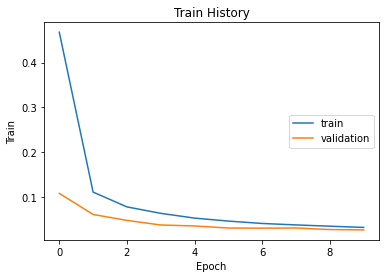

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,1,1,2,0
1,0,1130,2,0,1,0,1,1,0,0
2,0,1,1030,0,0,0,0,1,0,0
3,1,0,3,1002,0,4,0,0,0,0
4,0,0,0,0,978,0,0,0,0,4
5,2,0,0,4,0,885,1,0,0,0
6,2,2,0,0,2,4,947,0,1,0
7,0,2,6,1,0,1,0,1015,1,2
8,3,0,2,1,1,1,0,1,962,3


In [14]:
# 使用1.x版本的tensorflow
%tensorflow_version 1.x

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 讀取mnist資料 
# x_train為60000筆訓練資料,每一筆資料為28x28的灰階手寫數字
# y_train為60000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
# x_test為10000筆訓練資料,每一筆資料為28x28的灰階手寫數字
# y_test為10000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape={}, y_train.shape={}".format(x_train.shape, y_train.shape))
print("x_test.shape={}, y_test.shape={}".format(x_test.shape, y_test.shape))


# 接著我們必須將x_train及x_test dataset由原本三維轉為四維矩陣以符合CNN的需求
# 這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4。
# MNIST圖片為灰階因此其channel為1，轉換後的shape為(ID, width, height, channel)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print("x_train.shape={}".format(x_train.shape))
print("x_test.shape={}".format(x_test.shape))


# 接下來將dataset的特徵值進行標準化，方法是除以255（因為圖像的像素點介於0~255之間）
# 可讓所有的特徵值介於0與1之間。除了可提昇模型預測的準確度，梯度運算時也能更快收斂。

x_train = x_train / 255
x_test = x_test / 255


# 手寫數字結果如果採用原來的1, 2, 3....在演算法中，會以為2是1的兩倍大，3是1的三倍大，其實並沒有這個意義
# 因此會採用Onehot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值。
# 舉例來說，原本y_train[0]=5，經過onehot encoding會變成[0,0,0,0,0,1,0,0,0,0]

y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)

# CNN模型建置
# filter代表過濾器的數量, kernel_size代表filter的大小
# padding: filter遇到邊緣的處理模式('same'為補0, 'valid'為忽略)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()     


# 模型編譯
# loss:損失函數 optimizer:學習函數(梯度縮減的方式) metrics:評估模型好壞的方式(accuracy=正確率)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 模型訓練
# x:訓練資料 y:訓練資料的答案 validation_split:訓練資料的多少百分比要拿來驗證 validation_data:驗證資料 
# epochs:模型訓練次數 

train_history=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)


# 模型評估

scores = model.evaluate(x_test, y_test)
print("模型正確率為：{}".format(scores[1]))


#繪製正確性與損失立歷史圖
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict_classes(x_test)
print(y_test.shape)
pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

In [15]:

!wget https://raw.githubusercontent.com/joshhu/must_examples/master/my_seg_small.txt


import sys
from gensim.models import word2vec
from gensim import models

sentences = word2vec.LineSentence("my_seg_small.txt")
model = word2vec.Word2Vec(sentences, size=5, min_count=1, negative=10)

model.save('word2vec.model')
model.wv.save_word2vec_format('word2vec.model', binary = False)
print('done')


input_str = "åŒ—äº¬"
res = model.wv.most_similar(input_str)
for item in res: 
      print(item[0] + ':' + str(item[1]))

--2020-04-23 03:08:19--  https://raw.githubusercontent.com/joshhu/must_examples/master/my_seg_small.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398 [text/plain]
Saving to: ‘my_seg_small.txt.2’

my_seg_small.txt.2  100%[===================>]     398  --.-KB/s    in 0s      

2020-04-23 03:08:19 (66.6 MB/s) - ‘my_seg_small.txt.2’ saved [398/398]

done


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyError: ignored

In [17]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D
from keras.optimizers import RMSprop
from keras import backend as K
from matplotlib.pyplot import imshow
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test)
print(scores[1])

60000 train samples
10000 test samples


NameError: ignored